# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Carregar a base de dados ajustada
df = pd.read_csv('base_preparada.csv')

# Verificar se há valores missing e preencher com a média
df = df.fillna(df.mean())

# Verificar se há colunas do tipo string e removê-las
df = df.select_dtypes(exclude=['object'])

# Separar a variável resposta (mau) e as variáveis explicativas
X = df.drop(columns=['mau'])
y = df['mau']

# Dividir a base em conjuntos de treinamento (70%) e validação (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar os tamanhos dos conjuntos
print(f'Tamanho do conjunto de treinamento: {X_train.shape}')
print(f'Tamanho do conjunto de validação: {X_test.shape}')

Tamanho do conjunto de treinamento: (11655, 28)
Tamanho do conjunto de validação: (4995, 28)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

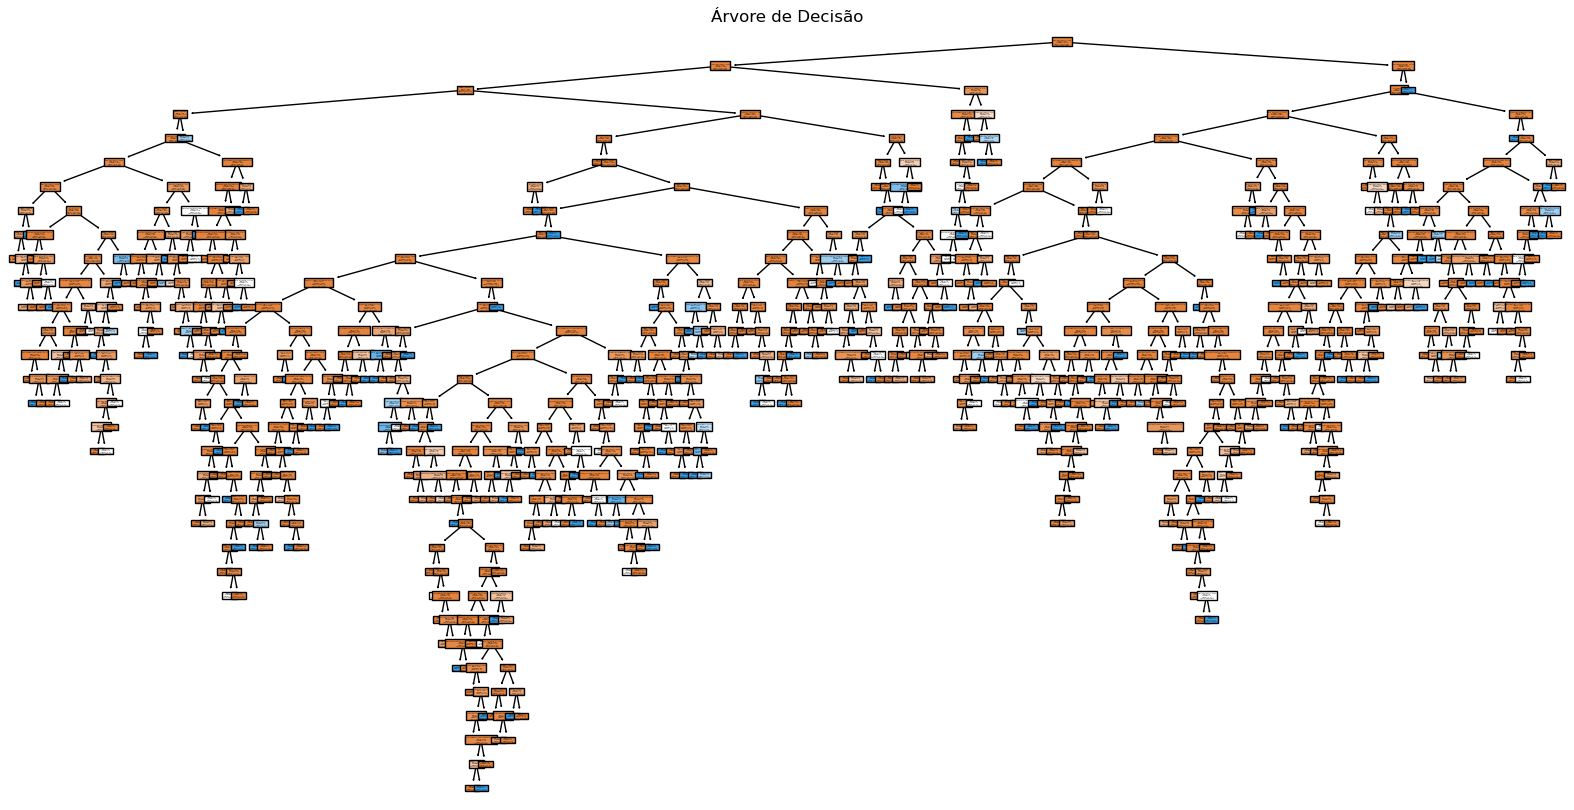

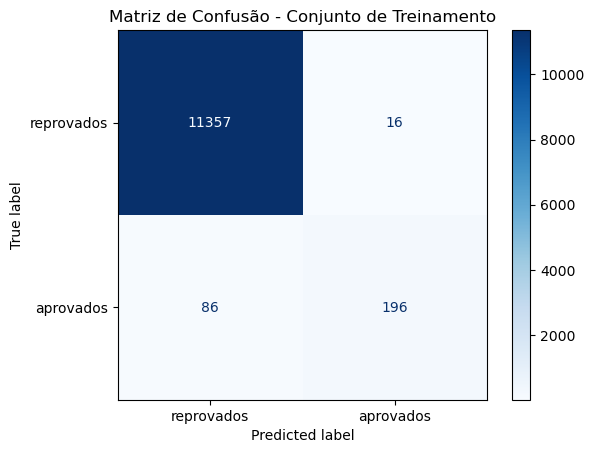

Acurácia na base de treinamento: 0.99


In [14]:
# Carregar a base de dados ajustada
df = pd.read_csv('base_preparada.csv')

# Verificar se há valores missing e preencher com a média
df = df.fillna(df.mean())

# Verificar se há colunas do tipo string e removê-las
df = df.select_dtypes(exclude=['object'])

# Separar a variável resposta (mau) e as variáveis explicativas
X = df.drop(columns=['mau'])
y = df['mau']

# Dividir a base em conjuntos de treinamento (70%) e validação (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir o objeto da árvore de decisão
arvore_decisao = DecisionTreeClassifier(random_state=42)

# Treinar o modelo com os dados de treinamento
arvore_decisao.fit(X_train, y_train)

# Ajustar o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotar a árvore de decisão
tree.plot_tree(arvore_decisao, feature_names=X_train.columns, class_names=['reprovados', 'aprovados'], filled=True)
plt.title('Árvore de Decisão')
plt.show()

# Prever os rótulos para o conjunto de validação
y_pred_train = arvore_decisao.predict(X_train)

# Gerar a matriz de confusão
cm_display = ConfusionMatrixDisplay.from_estimator(arvore_decisao, X_train, y_train, display_labels=['reprovados', 'aprovados'], cmap=plt.cm.Blues)

# Mostrar a matriz de confusão
cm_display.ax_.set_title('Matriz de Confusão - Conjunto de Treinamento')
plt.show()

# Calcular a acurácia na base de treinamento
acuracia_treinamento = accuracy_score(y_train, y_pred_train)
print(f'Acurácia na base de treinamento: {acuracia_treinamento:.2f}')


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

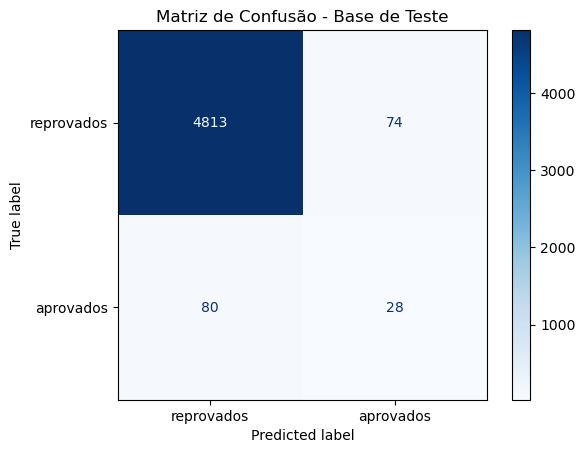

Acurácia na base de teste: 0.97
Acurácia na base de treinamento: 0.99


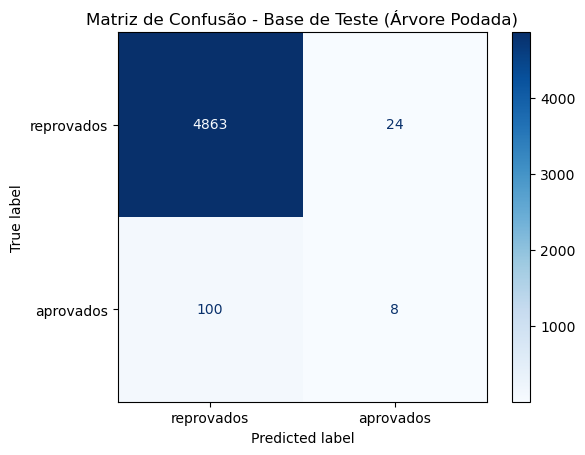

Proporção de proponentes classificados como "maus": 0.01
Acurácia se todos os contratos fossem classificados como "bons": 0.98


In [16]:
# Carregar a base de dados ajustada
df = pd.read_csv('base_preparada.csv')

# Verificar se há valores missing e preencher com a média
df = df.fillna(df.mean())

# Verificar se há colunas do tipo string e removê-las
df = df.select_dtypes(exclude=['object'])

# Separar a variável resposta (mau) e as variáveis explicativas
X = df.drop(columns=['mau'])
y = df['mau']

# Dividir a base em conjuntos de treinamento (70%) e validação (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir o objeto da árvore de decisão
arvore_decisao = DecisionTreeClassifier(random_state=42)

# Treinar o modelo com os dados de treinamento
arvore_decisao.fit(X_train, y_train)

# Classificar a base de teste
y_pred_test = arvore_decisao.predict(X_test)

# Produzir a visualização da matriz de confusão para a base de teste
cm_display_test = ConfusionMatrixDisplay.from_estimator(arvore_decisao, X_test, y_test, display_labels=['reprovados', 'aprovados'], cmap=plt.cm.Blues)
cm_display_test.ax_.set_title('Matriz de Confusão - Base de Teste')
plt.show()

# Calcular a acurácia na base de teste
acuracia_teste = accuracy_score(y_test, y_pred_test)
print(f'Acurácia na base de teste: {acuracia_teste:.2f}')

# Calcular a acurácia na base de treinamento (já calculada anteriormente)
y_pred_train = arvore_decisao.predict(X_train)
acuracia_treinamento = accuracy_score(y_train, y_pred_train)
print(f'Acurácia na base de treinamento: {acuracia_treinamento:.2f}')

# Treinar uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10
arvore_decisao_podada = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
arvore_decisao_podada.fit(X_train, y_train)

# Classificar a base de teste com a nova árvore
y_pred_test_podada = arvore_decisao_podada.predict(X_test)

# Produzir a visualização da matriz de confusão para a nova árvore
cm_display_test_podada = ConfusionMatrixDisplay.from_estimator(arvore_decisao_podada, X_test, y_test, display_labels=['reprovados', 'aprovados'], cmap=plt.cm.Blues)
cm_display_test_podada.ax_.set_title('Matriz de Confusão - Base de Teste (Árvore Podada)')
plt.show()

# Calcular a proporção de proponentes classificados como 'maus'
proporcao_maus = sum(y_pred_test_podada == 1) / len(y_pred_test_podada)
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus:.2f}')

# Calcular a acurácia se todos os contratos fossem classificados como 'bons'
todos_bons = [0] * len(y_test)
acuracia_todos_bons = accuracy_score(y_test, todos_bons)
print(f'Acurácia se todos os contratos fossem classificados como "bons": {acuracia_todos_bons:.2f}')
